In [75]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore")
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import resample
from sklearn.impute import KNNImputer
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier, HistGradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [46]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic' # 예시: 맑은 고딕으로 설정 (Windows 환경 시)
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
#data=pd.read_csv("C:/semi_project/health_checkup/JDM/2022년~2023년/건강데이터_2012_2023_합본.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'C:/semi_project/health_checkup/JDM/2022년~2023년/건강데이터_2012_2023_합본.csv'

2017~2020년도 고혈압 치료 여부 없는 사람들의 고혈압 유병여부 확인

In [74]:
data=pd.read_csv("C:/건강검진/health_checkup/JDM/최종질병예측/건강조사_2012~2023.csv")

In [18]:
data

mod_d          ID       ID_fam  year  region  town_t  apt_t  \
0      b'2022.03.08'         NaN  b'A1349783'  2012     1.0     1.0    1.0   
1      b'2022.03.08'         NaN  b'A1349783'  2012     1.0     1.0    1.0   
2      b'2022.03.08'         NaN  b'A1349783'  2012     1.0     1.0    1.0   
3      b'2022.03.08'         NaN  b'A1349779'  2012     1.0     1.0    1.0   
4      b'2022.03.08'         NaN  b'A1349779'  2012     1.0     1.0    1.0   
...              ...         ...          ...   ...     ...     ...    ...   
91023    2024.12.10.  YA84382303     YA843823  2023     1.0     1.0    2.0   
91024    2024.12.10.  YA84208301     YA842083  2023     1.0     1.0    2.0   
91025    2024.12.10.  YA84382304     YA843823  2023     1.0     1.0    2.0   
91026    2024.12.10.  YA84410601     YA844106  2023     1.0     1.0    2.0   
91027    2024.12.10.  YA84384301     YA843843  2023     1.0     1.0    2.0   

           psu  sex   age  age_month  incm  ho_incm  incm5  ho_incm5  edu  \
0      b'A134'  2.0  19.0        NaN   3.0      3.0    4.0       4.0  3.0   
1      b'A134'  2.0  44.0        NaN   3.0      3.0    4.0       4.0  4.0   
2      b'A134'  1.0  48.0        NaN   3.0      3.0    3.0       4.0  3.0   
3      b'A134'  1.0  45.0        NaN   3.0      4.0    4.0       4.0  3.0   
4      b'A134'  2.0  47.0        NaN   3.0      4.0    4.0       4.0  2.0   
...        ...  ...   ...        ...   ...      ...    ...       ...  ...   
91023     YA84  2.0   9.0        NaN   2.0      3.0    3.0       3.0  1.0   
91024     YA84  1.0  75.0        NaN   3.0      2.0    4.0       2.0  1.0   
91025     YA84  1.0   9.0        NaN   2.0      3.0    3.0       3.0  1.0   
91026     YA84  2.0  61.0        NaN   2.0      2.0    2.0       3.0  3.0   
91027     YA84  2.0  50.0        NaN   2.0      2.0    2.0       3.0  4.0   

       occp         wt_hs      wt_itvex         wt_oe        wt_ntr  \
0       7.0   6328.796718   7753.113108           NaN   8289.914519   
1       1.0   6328.796718   5125.933713           NaN   5040.418984   
2       5.0   6328.796718   9384.817359           NaN  13656.358598   
3       3.0   6328.796718  14077.226038           NaN           NaN   
4       3.0   6328.796718  12393.346024           NaN  19104.277429   
...     ...           ...           ...           ...           ...   
91023   NaN  11460.881778  12605.334818  12175.772093  12605.334818   
91024   7.0  11460.881778  11633.543550  11740.649472  11581.903830   
91025   NaN  11460.881778  15169.783423  12493.157722  17667.076039   
91026   6.0  11460.881778  12826.112033  11042.440313  12973.681626   
91027   7.0  11460.881778  11151.948250  18432.774553  11267.698823   

             wt_tot       wt_oent  kstrata  cfam  genertn  allownc  house  \
0      12868.977377           NaN    512.0   5.0      4.0     20.0    2.0   
1       7492.375534           NaN    512.0   5.0      4.0     20.0    2.0   
2      17544.992243           NaN    512.0   5.0      4.0     20.0    2.0   
3               NaN           NaN    512.0   3.0      4.0     20.0    2.0   
4      21590.625741           NaN    512.0   3.0      4.0     20.0    2.0   
...             ...           ...      ...   ...      ...      ...    ...   
91023  11767.917247  11783.992783    101.0   4.0      4.0     20.0    2.0   
91024  11479.203518  11934.223778    101.0   3.0      4.0     20.0    1.0   
91025  12238.551756  12170.107712    101.0   4.0      4.0     20.0    2.0   
91026  10450.494228  11116.588032    101.0   3.0      4.0     20.0    1.0   
91027  13039.787224  18903.364294    101.0   4.0      4.0     20.0    3.0   

       live_t  ainc_unit1  ainc_1        ainc  marri_1  marri_2  fam_rela  \
0         3.0         1.0  6200.0  516.666667      2.0     88.0       3.0   
1         3.0         1.0  6200.0  516.666667      1.0      1.0       2.0   
2         3.0         1.0  6200.0  516.666667      1.0      1.0       1.0   
3         3.0         1.0  5760.0  480.000000      1.0      1.0    

소아 청소년 뺀 데이터프레임 만들기

In [19]:
# age 컬럼이 만 나이라고 가정할 때
data = data[data["age"] > 19].copy()

In [21]:
data.describe()

year        region        town_t         apt_t           sex  \
count  72862.000000  72862.000000  72862.000000  72862.000000  72862.000000   
mean    2017.438226      7.426560      1.201792      1.519695      1.561843   
std        3.406973      4.930138      0.401341      0.499615      0.496164   
min     2012.000000      1.000000      1.000000      1.000000      1.000000   
25%     2015.000000      2.000000      1.000000      1.000000      1.000000   
50%     2017.000000      8.000000      1.000000      2.000000      2.000000   
75%     2020.000000     11.000000      1.000000      2.000000      2.000000   
max     2023.000000     17.000000      2.000000      2.000000      2.000000   

                age  age_month          incm       ho_incm         incm5  \
count  72862.000000        0.0  72420.000000  72420.000000  72420.000000   
mean      52.192268        NaN      2.499061      2.644629      2.998053   
std       16.736870        NaN      1.117448      1.094773      1.414334   
min       20.000000        NaN      1.000000      1.000000      1.000000   
25%       39.000000        NaN      2.000000      2.000000      2.000000   
50%       53.000000        NaN      2.000000      3.000000      3.000000   
75%       66.000000        NaN      3.000000      4.000000      4.000000   
max       80.000000        NaN      4.000000      4.000000      5.000000   

           ho_incm5           edu          occp         wt_hs      wt_itvex  \
count  72420.000000  65409.000000  64754.000000  72862.000000  70068.000000   
mean       3.089616      2.845220      4.733700   5795.610881   7137.600103   
std        1.411978      1.129834      2.302391   2281.543564   4509.268427   
min        1.000000      1.000000      1.000000    191.029252     75.656161   
25%        2.000000      2.000000      3.000000   4349.950414   4014.227807   
50%        3.000000      3.000000      5.000000   5555.003434   6027.061165   
75%        4.000000      4.000000      7.000000   7006.541242   9041.297360   
max        5.000000      4.000000      7.000000  17151.828446  45812.383984   

              wt_oe        wt_ntr        wt_tot       wt_oent       kstrata  \
count  24895.000000  64180.000000  61386.000000  21989.000000  72862.000000   
mean    8678.774212   7792.417638   8147.091584   9825.734867    638.326535   
std     5044.539681   5067.471901   5116.150335   6164.412393    258.058786   
min      443.011001     85.343626     84.338255    464.837148    101.000000   
25%     5105.706880   4245.163249   4457.806475   5506.915647    601.000000   
50%     7481.545168   6464.820508   6751.954043   8159.925134    702.000000   
75%    11013.882558   9953.457810  10545.006472  12398.032542    901.000000   
max    29766.794641  65613.000000  29528.738006  39314.367241    927.000000   

               cfam       genertn       allownc         house        live_t  \
count  72862.000000  72840.000000  72840.000000  72840.000000  72840.000000   
mean       2.861588      3.550618     19.380423      1.830121      1.819385   
std        1.223162      1.703971      3.545269      0.676611      0.777555   
min        1.000000      1.000000     10.000000      1.000000      1.000000   
25%        2.000000      2.000000     20.000000      1.000000      1.000000   
50%        3.000000      4.000000     20.000000      2.000000      2.000000   
75%        4.000000      4.000000     20.000000      2.000000      2.000000   
max        9.000000      9.000000     99.000000      9.000000      9.000000   

         ainc_unit1         ainc_1          ainc       marri_1       marri_2  \
count  72840.000000   72840.000000  72420.000000  72839.000000  72839.000000   
mean       1.358951    9672.217889    419.924550      1.165859     15.619462   
std        0.800411   75532.305474    328.615344      0.394038     32.107791   
min        1.000000      17.000000     16.666667      1.000000      1.000000   
25%        1.000000     480.000000    166.666667      1.000000      1.000000   
50

고혈압 치료 여부 없는데 혈압수치 높은(주의혈압, 고혈압전단계)

In [25]:
# 1. 치료 안 받은 + 2017~2020년도 조건 필터
filtered = data[
    (data["DI1_pt"] == 0) & #고혈압 치료 여부 없음
    (data["year"].isin([2017, 2018, 2019, 2020]))
]

# 2. 각각 조건 필터링
pre_hp = filtered[(filtered["HE_sbp1"] >= 120) & (filtered["HE_sbp1"] < 130) & (filtered["HE_dbp1"] < 80)]
pre_high_hp = filtered[(filtered["HE_sbp1"] >= 130) & (filtered["HE_sbp1"] < 140) & (filtered["HE_dbp1"] < 90)]

# 3. 개수 출력
print("Class 2 (주의혈압):", len(pre_hp))
print("Class 3 (고혈압 전단계):", len(pre_high_hp))


Class 2 (주의혈압): 50
Class 3 (고혈압 전단계): 83


성인기준 고혈압 치료 비해당(의사진단여부 없음) -> 의사진단여부 없으니 치료도 안 함

In [26]:
# 1. 치료 안 받은 + 2017~2020년도 조건 필터
filtered = data[
    (data["DI1_pt"] == 8) & #고혈압 치료 여부 없음
    (data["year"].isin([2017, 2018, 2019, 2020]))
]

# 2. 각각 조건 필터링
pre_hp = filtered[(filtered["HE_sbp1"] >= 120) & (filtered["HE_sbp1"] < 130) & (filtered["HE_dbp1"] < 80)]
pre_high_hp = filtered[(filtered["HE_sbp1"] >= 130) & (filtered["HE_sbp1"] < 140) & (filtered["HE_dbp1"] < 90)]

# 3. 개수 출력
print("Class 2 (주의혈압):", len(pre_hp))
print("Class 3 (고혈압 전단계):", len(pre_high_hp))


Class 2 (주의혈압): 1530
Class 3 (고혈압 전단계): 1504


17~20년도 고혈압 치료여부 없음(의사진단 안 받아서) 열 중  
주의혈압, 고혈압전단계에 해당하는 수축기혈압,이완기혈압 리매핑 후 그것들만 2022~2023년도 데이터셋에 합치기기

In [1]:
import pandas as pd
import numpy as np

# --- 1. 2017년~2020년 데이터 처리 ---
# 2012년~2023년 합본 데이터셋 로드 (2017년, 2018년, 2019년, 2020년 데이터 포함)
try:
    all_years_data = pd.read_csv("C:/건강검진/health_checkup/JDM/최종질병예측/건강조사_2012~2023.csv")
    print("2012-2023 합본 데이터 로드 성공.")
except FileNotFoundError:
    print("오류: '건강데이터_2012_2023_합본.csv' 파일을 찾을 수 없습니다. 경로를 확인해주세요.")
    exit() # 파일이 없으면 스크립트 종료

# 1. 치료 안 받은 + 2017~2020년도 조건 필터
# 'DI1_pt' 컬럼이 존재하고, 2017-2020년 데이터만 추출
if 'DI1_pt' in all_years_data.columns:
    data_17_20_filtered = all_years_data[
        (all_years_data["DI1_pt"] == 8) & # 고혈압 치료 여부 없음
        (all_years_data["year"].isin([2017, 2018, 2019, 2020]))
    ].copy()
    print(f"2017년~2020년, 고혈압 미치료 데이터 추출 완료. 행 수: {len(data_17_20_filtered)}")
else:
    print("오류: 'DI1_pt' 컬럼이 2012-2023 합본 데이터에 없습니다. 필터링 조건을 확인해주세요.")
    exit()

# 고혈압 4단계 기준 리매핑 함수 (2022년 기준)
def remap_hypertension(sbp, dbp):
    if pd.isna(sbp) or pd.isna(dbp):
        return np.nan  # 혈압 값이 없는 경우 NaN 반환
    if sbp < 120 and dbp < 80:
        return 1  # 정상
    elif 120 <= sbp < 130 and dbp < 80:
        return 2  # 주의
    elif 130 <= sbp < 140 and dbp < 90:
        return 3  # 고혈압 전단계
    elif sbp >= 140 or dbp >= 90:
        return 4  # 고혈압
    else:  # 정의되지 않은 케이스
        return np.nan

# 고혈압 클래스 생성
# 'HE_sbp1'와 'HE_dbp1' 컬럼이 존재하는지 확인
if 'HE_sbp1' in data_17_20_filtered.columns and 'HE_dbp1' in data_17_20_filtered.columns:
    # 필터링된 데이터에 'hypertension_class' 컬럼 생성
    data_17_20_filtered["hypertension_class"] = data_17_20_filtered.apply(
        lambda row: remap_hypertension(row["HE_sbp1"], row["HE_dbp1"]), axis=1
    )
    print("2017년~2020년 필터링된 데이터 고혈압 클래스 재분류 및 'hypertension_class' 컬럼 생성 완료.")
else:
    print("오류: 'HE_sbp1' 또는 'HE_dbp1' 컬럼이 2017-2020년 필터링된 데이터에 없습니다.")
    exit()

# 재분류된 데이터에서 클래스 2(주의), 3(고혈압 전단계)만 추출
minority_classes_17_20 = data_17_20_filtered[data_17_20_filtered["hypertension_class"].isin([2, 3])].copy()
print(f"2017년~2020년 데이터에서 클래스 2, 3 (고혈압 주의/전단계) 추출 완료. 행 수: {len(minority_classes_17_20)}")


# --- 2. 기존 2022년~2023년 데이터 로드 및 준비 ---
# 기존 2022년~2023년 데이터셋 로드
try:
    main_data_22_23 = pd.read_csv("C:/건강검진/health_checkup/JDM/최종질병예측/건강데이터_2022_2023_합본.csv")
    print("2022-2023년 메인 데이터 로드 성공.")
except FileNotFoundError:
    print("오류: '건강데이터_2022_2023_합본.csv' 파일을 찾을 수 없습니다. 경로를 확인해주세요.")
    exit()

# 기존 2022-2023년 데이터셋의 고혈압 컬럼명을 'hypertension_class'로 통일
main_data_22_23_processed = main_data_22_23.copy()
if 'HE_HP' in main_data_22_23_processed.columns:
    main_data_22_23_processed = main_data_22_23_processed.rename(columns={'HE_HP': 'hypertension_class'})
    print("기존 데이터셋 'HE_HP' 컬럼명을 'hypertension_class'로 변경 완료 (병합 준비).")
else:
    print("경고: 기존 2022-2023년 데이터셋에 'HE_HP' 컬럼이 없습니다. 고혈압 분류 컬럼을 확인해주세요.")
    # 이 경우, main_data_22_23_processed['hypertension_class']를 다시 생성하는 로직이 필요할 수 있습니다.
    # 예: main_data_22_23_processed["hypertension_class"] = main_data_22_23_processed.apply(
    #           lambda row: remap_hypertension(row["HE_sbp1"], row["HE_dbp1"]), axis=1)


# --- 3. 데이터 합치기 (Concatenate) ---
# 두 데이터셋의 공통 컬럼 확인 및 선택
common_columns = list(set(minority_classes_17_20.columns) & set(main_data_22_23_processed.columns))

if 'hypertension_class' not in common_columns:
    print("오류: 'hypertension_class' 컬럼이 공통 컬럼에 포함되어 있지 않습니다. 확인이 필요합니다.")
    exit()

print(f"두 데이터셋의 공통 컬럼 수: {len(common_columns)}")
# 공통 컬럼만 선택하여 병합 수행
merged_data = pd.concat([
    main_data_22_23_processed[common_columns],
    minority_classes_17_20[common_columns]
], ignore_index=True)

print(f"\n데이터 병합 완료. 최종 데이터셋 행 수: {len(merged_data)}")

# --- 4. 최종 컬럼명 변경 ---
# 합쳐진 데이터프레임에서 'hypertension_class'를 'HE_HP'로 다시 변경
if 'hypertension_class' in merged_data.columns:
    merged_data = merged_data.rename(columns={'hypertension_class': 'HE_HP'})
    print("최종 데이터셋의 'hypertension_class' 컬럼을 'HE_HP'로 변경 완료.")
else:
    print("오류: 최종 병합된 데이터셋에 'hypertension_class' 컬럼이 없습니다. 확인이 필요합니다.")

# 최종 병합된 데이터의 고혈압 클래스 ('HE_HP') 분포 확인
print("\n최종 병합된 데이터의 고혈 압 클래스 ('HE_HP') 분포:")
print(merged_data["HE_HP"].value_counts(dropna=False))
print("\n클래스별 비율:")
print(merged_data["HE_HP"].value_counts(normalize=True, dropna=False))

C:\Users\asia\AppData\Local\Temp\ipykernel_19696\2133241791.py:7: DtypeWarning: Columns (1,37,38,61,79,114,175,229,237,243,284,319,320,321,324,325,326,329,330,331,332,366,379,381,384,396,398,400,442,589,590,594,629,643,685,703,715,723,764,808,812,819,835,855,868,874,885,905,924,927,1023,1127,1129,1131,1132,1148,1171,1172,1173,1182,1186,1199,1229,1234,1237,1239,1259,1262,1265,1293,1363,1365,1366,1368,1370,1397,1420,1462,1464,1474) have mixed types. Specify dtype option on import or set low_memory=False.
  all_years_data = pd.read_csv("C:/건강검진/health_checkup/JDM/최종질병예측/건강조사_2012~2023.csv")


2012-2023 합본 데이터 로드 성공.
2017년~2020년, 고혈압 미치료 데이터 추출 완료. 행 수: 23888
2017년~2020년 필터링된 데이터 고혈압 클래스 재분류 및 'hypertension_class' 컬럼 생성 완료.
2017년~2020년 데이터에서 클래스 2, 3 (고혈압 주의/전단계) 추출 완료. 행 수: 3430
2022-2023년 메인 데이터 로드 성공.
기존 데이터셋 'HE_HP' 컬럼명을 'hypertension_class'로 변경 완료 (병합 준비).
두 데이터셋의 공통 컬럼 수: 98

데이터 병합 완료. 최종 데이터셋 행 수: 16624
최종 데이터셋의 'hypertension_class' 컬럼을 'HE_HP'로 변경 완료.

최종 병합된 데이터의 고혈 압 클래스 ('HE_HP') 분포:
HE_HP
1.0    4772
4.0    3803
3.0    3160
2.0    2704
NaN    2185
Name: count, dtype: int64

클래스별 비율:
HE_HP
1.0    0.287055
4.0    0.228766
3.0    0.190087
2.0    0.162656
NaN    0.131436
Name: proportion, dtype: float64


In [ ]:
# 클래스 분포 확인
print(merged_data["HE_HP"].value_counts().sort_index())

HE_HP
1.0    4772
2.0    2704
3.0    3160
4.0    3803
Name: count, dtype: int64


17~20년도와 22~23년도 데이터셋 합치기

In [4]:
# 클래스 분포 확인
merged_data["HE_HP"].value_counts().sort_index()

output_file_path = "C:/건강검진/health_checkup/JDM/최종질병예측/당뇨(2~3 클래스)합침.csv" # 저장할 경로와 파일명 지정

try:
    # merged_data 데이터프레임을 지정된 경로에 CSV 파일로 저장
    merged_data.to_csv(output_file_path, index=False, encoding='utf-8-sig')
    print(f"\n데이터프레임이 '{output_file_path}' 경로에 성공적으로 저장되었습니다.")
except Exception as e:
    print(f"\n데이터프레임 저장 중 오류 발생: {e}")


데이터프레임이 'C:/건강검진/health_checkup/JDM/최종질병예측/당뇨(2~3 클래스)합침.csv' 경로에 성공적으로 저장되었습니다.


In [48]:
data=pd.read_csv("C:/건강검진/health_checkup/JDM/최종질병예측/당뇨(2~3 클래스)합침.csv")

In [49]:
data = merged_data.sort_values(by='year')

고혈압 여부 클래스 분포 확인

C:\Users\asia\AppData\Local\Temp\ipykernel_19696\1030221481.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=data, palette="Spectral", ax=axes[i])


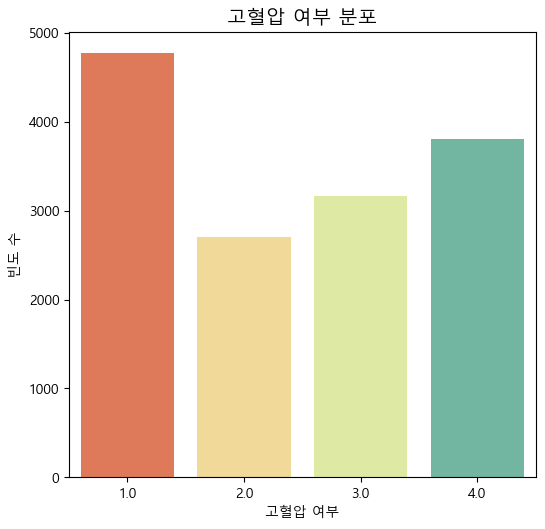

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시각화할 변수 리스트
targets = ['HE_HP']
column_labels = {
    'HE_HP': '고혈압 여부'
}

# 서브플롯 설정 (2행 4열: 8개의 칸 중 3개 사용)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()  # 2차원 → 1차원 평탄화

# 각 변수에 대해 countplot 그리기
for i, var in enumerate(targets):
    sns.countplot(x=var, data=data, palette="Spectral", ax=axes[i])
    axes[i].set_title(f"{column_labels[var]} 분포", fontsize=14)
    axes[i].set_xlabel(column_labels[var])
    axes[i].set_ylabel('빈도 수')

# 사용하지 않는 subplot 숨기기
for j in range(len(targets), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


19~21년도 데이터 셋에서 고혈압 클래스 3 추출 후 합치기

In [67]:
import pandas as pd
import numpy as np

# --- 1. 2019년~2020년 데이터 처리 ---
# 2012년~2023년 합본 데이터셋 로드 (2019년, 2020년 데이터 포함)
try:
    all_years_data = pd.read_csv("C:/건강검진/health_checkup/JDM/최종질병예측/건강조사_2012~2023.csv")
    print("2012-2023 합본 데이터 로드 성공.")
except FileNotFoundError:
    print("오류: '건강데이터_2012_2023_합본.csv' 파일을 찾을 수 없습니다. 경로를 확인해주세요.")
    exit()

# 2019년, 2020년 데이터만 추출
data_19_20 = all_years_data[all_years_data["year"].isin([2019, 2020,2021])].copy()
print(f"2019년, 2020년 데이터 추출 완료. 행 수: {len(data_19_20)}")

# 2019-2020년 데이터에서 'HE_DM_HbA1c' 컬럼의 클래스 3만 추출
# (클래스 3이 소수 클래스임을 가정)
if 'HE_DM_HbA1c' in data_19_20.columns:
    minority_classes_19_20 = data_19_20[data_19_20["HE_DM_HbA1c"].isin([3])].copy()
    print(f"2019년, 2020년 데이터에서 당뇨(HE_DM_HbA1c) 클래스 3 추출 완료. 행 수: {len(minority_classes_19_20)}")
else:
    print("오류: 'HE_DM_HbA1c' 컬럼이 2019-2020년 데이터에 없습니다. 당뇨 데이터 처리가 불가능합니다.")
    exit()

# --- 2. 기존 2022년~2023년 데이터 로드 및 준비 ---
# 이전 답변에서 저장한 '당뇨합치기.csv'를 로드
try:
    main_data_22_23 = pd.read_csv("C:/건강검진/health_checkup/JDM/최종질병예측/당뇨(2~3 클래스)합침.csv")
    print("2022-2023년 메인 당뇨 데이터 로드 성공.")
except FileNotFoundError:
    print("오류: '당뇨합치기.csv' 파일을 찾을 수 없습니다. 이 파일이 존재해야 합니다.")
    print("혹은 '건강데이터_2022_2023_합본.csv'에서 2022-2023년 데이터를 직접 로드하고 당뇨 기준에 맞게 전처리해야 합니다.")
    exit()

# main_data_22_23_processed 변수 정의 누락 해결
# 여기서는 main_data_22_23 자체를 사용하므로 별도의 copy()나 rename은 필요 없을 수 있습니다.
# 만약 '당뇨합치기.csv'에 'HE_DM_HbA1c' 외 다른 컬럼명이 당뇨 분류를 나타낸다면 여기서 rename이 필요합니다.
main_data_22_23_processed = main_data_22_23.copy() # 변수 정의 누락 해결

# --- 3. 데이터 합치기 (Concatenate) ---
# 두 데이터셋의 공통 컬럼 확인 및 선택
# 당뇨 분류 컬럼이 'HE_DM_HbA1c'임을 명시
common_columns = list(set(minority_classes_19_20.columns) & set(main_data_22_23_processed.columns))

if 'HE_DM_HbA1c' not in common_columns:
    print("오류: 'HE_DM_HbA1c' 컬럼이 공통 컬럼에 포함되어 있지 않습니다. 데이터셋의 컬럼들을 확인해주세요.")
    print("minority_classes_19_20 컬럼:", minority_classes_19_20.columns.tolist())
    print("main_data_22_23_processed 컬럼:", main_data_22_23_processed.columns.tolist())
    exit()

print(f"두 데이터셋의 공통 컬럼 수: {len(common_columns)}")
# 공통 컬럼만 선택하여 병합 수행
merged_data = pd.concat([
    main_data_22_23_processed[common_columns],
    minority_classes_19_20[common_columns]
], ignore_index=True)

print(f"\n데이터 병합 완료. 최종 데이터셋 행 수: {len(merged_data)}")

# 최종 병합된 데이터의 당뇨 클래스 ('HE_DM_HbA1c') 분포 확인
print("\n최종 병합된 데이터의 당뇨 클래스 ('HE_DM_HbA1c') 분포:")
print(merged_data["HE_DM_HbA1c"].value_counts(dropna=False))
print("\n클래스별 비율:")
print(merged_data["HE_DM_HbA1c"].value_counts(normalize=True, dropna=False))

# --- 4. 최종 데이터프레임을 CSV 파일로 저장 (필요시) ---
output_file_path_final = "C:/건강검진/health_checkup/JDM/최종질병예측/최종_건강검진_데이터셋.csv" # 저장할 경로와 파일명 지정 (더 명확하게)
try:
    merged_data.to_csv(output_file_path_final, index=False, encoding='utf-8-sig')
    print(f"\n최종 데이터프레임이 '{output_file_path_final}' 경로에 성공적으로 저장되었습니다.")
except Exception as e:
    print(f"\n데이터프레임 저장 중 오류 발생: {e}")

# 이제 'merged_data' 데이터프레임을 사용하여 당뇨 모델 학습을 진행하면 됩니다.
# X = merged_data.drop('HE_DM_HbA1c', axis=1) # 실제 피처 컬럼명으로 수정 필요
# y = merged_data['HE_DM_HbA1c']

2012-2023 합본 데이터 로드 성공.
2019년, 2020년 데이터 추출 완료. 행 수: 22559
2019년, 2020년 데이터에서 당뇨(HE_DM_HbA1c) 클래스 3 추출 완료. 행 수: 2686
2022-2023년 메인 당뇨 데이터 로드 성공.
두 데이터셋의 공통 컬럼 수: 98

데이터 병합 완료. 최종 데이터셋 행 수: 19310

최종 병합된 데이터의 당뇨 클래스 ('HE_DM_HbA1c') 분포:
HE_DM_HbA1c
1.0    6065
NaN    4682
3.0    4517
2.0    4046
Name: count, dtype: int64

클래스별 비율:
HE_DM_HbA1c
1.0    0.314086
NaN    0.242465
3.0    0.233920
2.0    0.209529
Name: proportion, dtype: float64

최종 데이터프레임이 'C:/건강검진/health_checkup/JDM/최종질병예측/최종_건강검진_데이터셋.csv' 경로에 성공적으로 저장되었습니다.


In [2]:
# 클래스 분포 확인
print(merged_data["HE_DM_HbA1c"].value_counts().sort_index())

HE_DM_HbA1c
1.0    6065
2.0    4046
3.0    4517
Name: count, dtype: int64


In [76]:
data=pd.read_csv("C:/건강검진/health_checkup/JDM/최종질병예측/최종_건강검진_데이터셋.csv")

In [ ]:
data

,HE_crea,DI2_ag,HE_ast,HE_sbp2,incm,HE_wt,HE_Ualb,BS12_1,BS1_1,DE1_31,BE3_32,DE1_4,DE1_dg,DI1_dg,BO1_1,HE_HPfh1,BP1,BS3_2,DI2_pr,HE_BUN,LS_VEG1,BD1_11,HE_Ucrea,BP16_1,HE_DMfh2,BS3_1,HE_wc,HE_HbA1c,sex,HE_HLfh2,DI2_pt,D_1_1,BP5,ho_incm,DE1_33,DI1_pt,HE_sbp1,HE_LDL_drct,L_LN_FQ,L_DN_FQ,HE_HTG,BO2_1,LS_FRUIT,BH1,HE_Upro,DI1_ag,HE_dbp2,L_OUT_FQ,DE1_34,DE1_pr,BP16_2,DE1_ag,HE_dbp1,BS12_47,HE_HCHOL,BE5_1,HE_glu,DI1_2,ID,age,DI1_pr,HE_HLfh1,HE_ht,DN1_dg,HE_alt,year,HE_chol,DI2_dg,BE9,BD2_1,cfam,BS12_47_1,DI2_2,HE_BMI,HE_HP,HE_obe,edu,HE_HPfh2,DN1_ag,HE_TG,HE_DMfh1,BE3_31,BE3_33,BS12_37,occp,HE_DM_HbA1c,HE_fh,BO1,genertn,DE1_32,BS12_2,BD1,DE1_3,region,DE1_pt,town_t,HE_HDL_st2,L_BR_FQ
0,0.61,888.0,22.0,138.0,3.0,60.6,9.7,2.0,3.0,8.0,1.0,8.0,0.0,1.0,1.0,0.0,2.0,888.0,8.0,13.0,2.0,1.0,84.6,8.0,0.0,8.0,84.3,5.6,2.0,0.0,8.0,3.0,8.0,4.0,8.0,1.0,135.0,122.0,1.0,1.0,0.0,1.0,2.0,1.0,0.0,48.0,89.0,5.0,8.0,8.0,10.0,888.0,90.0,8.0,0.0,1.0,94.0,1.0,YA01220302,56.0,1.0,0.0,151.2,0.0,16.0,2022.0,199.0,0.0,88.0,8.0,4.0,888.0,8.0,26.507517,4.0,4.0,3.0,1.0,888.0,181.0,0.0,5.0,30.0,2.0,7.0,1.0,1.0,4.0,4.0,8.0,8.0,2.0,8.0,1.0,8.0,1.0,56.0,3.0
1,0.86,888.0,28.0,128.0,3.0,82.3,NaN,2.0,3.0,8.0,3.0,8.0,0.0,0.0,3.0,1.0,3.0,888.0,8.0,14.0,2.0,3.0,54.3,7.0,0.0,8.0,86.2,5.3,1.0,0.0,8.0,2.0,8.0,4.0,8.0,8.0,145.0,63.0,1.0,1.0,0.0,1.0,3.0,1.0,0.0,888.0,78.0,4.0,8.0,8.0,7.0,888.0,77.0,8.0,0.0,6.0,84.0,8.0,YA01220303,30.0,8.0,1.0,174.1,0.0,18.0,2022.0,122.0,0.0,88.0,2.0,4.0,888.0,8.0,27.152029,3.0,4.0,4.0,1.0,888.0,63.0,1.0,8.0,0.0,2.0,3.0,1.0,1.0,4.0,4.0,8.0,8.0,2.0,8.0,1.0,8.0,1.0,48.0,1.0
2,0.60,888.0,17.0,104.0,3.0,59.0,9.4,2.0,3.0,8.0,0.0,8.0,0.0,0.0,2.0,1.0,2.0,888.0,8.0,8.0,2.0,4.0,192.4,6.0,0.0,8.0,69.4,5.0,2.0,1.0,8.0,2.0,8.0,4.0,8.0,8.0,103.0,124.0,1.0,2.0,NaN,1.0,2.0,2.0,0.0,888.0,63.0,3.0,8.0,8.0,8.0,888.0,64.0,8.0,0.0,6.0,87.0,8.0,YA01220304,25.0,8.0,1.0,166.4,0.0,15.0,2022.0,202.0,0.0,88.0,1.0,4.0,888.0,8.0,21.308131,1.0,2.0,4.0,1.0,888.0,53.0,1.0,8.0,20.0,2.0,7.0,1.0,1.0,4.0,4.0,8.0,8.0,2.0,8.0,1.0,8.0,1.0,75.0,4.0
3,0.90,56.0,20.0,120.0,3.0,67.1,NaN,2.0,2.0,8.0,1.0,8.0,0.0,0.0,1.0,0.0,4.0,888.0,1.0,18.0,1.0,3.0,99.1,9.0,0.0,3.0,83.5,5.2,1.0,0.0,1.0,2.0,8.0,3.0,8.0,8.0,116.0,74.0,1.0,1.0,0.0,2.0,2.0,1.0,0.0,888.0,78.0,4.0,8.0,8.0,9.0,888.0,80.0,8.0,1.0,1.0,87.0,8.0,YA01236501,66.0,8.0,0.0,168.7,0.0,15.0,2022.0,136.0,1.0,88.0,2.0,2.0,888.0,1.0,23.577207,2.0,3.0,4.0,1.0,888.0,123.0,0.0,8.0,30.0,2.0,7.0,1.0,1.0,3.0,2.0,8.0,8.0,2.0,8.0,1.0,8.0,1.0,47.0,1.0
4,0.67,53.0,26.0,131.0,3.0,53.9,3.3,2.0,3.0,8.0,1.0,8.0,0.0,0.0,1.0,1.0,3.0,888.0,1.0,10.0,1.0,2.0,46.5,7.0,0.0,8.0,77.5,5.6,2.0,0.0,1.0,2.0,8.0,3.0,8.0,8.0,145.0,82.0,1.0,1.0,0.0,1.0,2.0,1.0,0.0,888.0,87.0,6.0,8.0,8.0,9.0,888.0,89.0,8.0,1.0,4.0,91.0,8.0,YA01236502,62.0,8.0,0.0,157.1,0.0,23.0,2022.0,149.0,1.0,88.0,1.0,2.0,888.0,1.0,21.839183,3.0,2.0,3.0,0.0,888.0,110.0,0.0,8.0,0.0,2.0,6.0,1.0,1.0,3.0,2.0,8.0,8.0,2.0,8.0,1.0,8.0,1.0,53.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19305,0.67,53.0,27.0,135.0,3.0,52.1,5.9,2.0,3.0,0.0,1.0,2.0,1.0,0.0,1.0,9.0,3.0,888.0,1.0,14.0,2.0,4.0,82.9,NaN,9.0,8.0,75.3,6.4,2.0,9.0,1.0,4.0,2.0,3.0,0.0,8.0,118.0,NaN,1.0,1.0,0.0,1.0,3.0,1.0,0.0,888.0,68.0,3.0,0.0,1.0,NaN,53.0,73.0,8.0,1.0,1.0,104.0,8.0,b'A904325802',67.0,8.0,9.0,141.6,0.0,29.0,2021.0,179.0,1.0,88.0,1.0,3.0,888.0,1.0,25.984312,3.0,4.0,4.0,9.0,888.0,74.0,9.0,8.0,40.0,2.0,7.0,3.0,1.0,4.0,4.0,1.0,8.0,2.0,1.0,1.0,1.0,1.0,74.0,4.0
19306,0.79,888.0,29.0,165.0,4.0,62.4,NaN,2.0,2.0,8.0,5.0,8.0,0.0,0.0,1.0,0.0,4.0,888.0,8.0,13.0,NaN,6.0,29.4,NaN,1.0,3.0,81.5,6.6,1.0,0.0,8.0,2.0,2.0,4.0,8.0,8.0,175.0,NaN,NaN,NaN,0.0,4.0,NaN,1.0,0.0,888.0,89.0,NaN,8.0,8.0,NaN,888.0,91.0

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19310 entries, 0 to 19309
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           19310 non-null  object 
 1   year         19310 non-null  float64
 2   age          19310 non-null  float64
 3   sex          19310 non-null  float64
 4   HE_ht        19011 non-null  float64
 5   HE_wt        19208 non-null  float64
 6   HE_wc        18373 non-null  float64
 7   HE_BMI       19005 non-null  float64
 8   HE_sbp1      18585 non-null  float64
 9   HE_dbp1      18585 non-null  float64
 10  HE_Upro      17722 non-null  float64
 11  HE_glu       17711 non-null  float64
 12  HE_HbA1c     17676 non-null  float64
 13  HE_chol      17711 non-null  float64
 14  HE_HDL_st2   17710 non-null  float64
 15  HE_TG        17711 non-null  float64
 16  HE_LDL_drct  12790 non-null  float64
 17  HE_crea      17711 non-null  float64
 18  HE_ast       17710 non-null  float64
 19  HE_a

In [70]:
import pandas as pd

# 남기고 싶은 컬럼 리스트
columns_to_keep = [
    'ID','year','age','sex','HE_ht', 'HE_wt', 'HE_wc', 'HE_BMI',
    'HE_sbp1', 'HE_dbp1',
    'HE_Upro', 'HE_glu','HE_HbA1c', 'HE_chol', 'HE_HDL_st2',
    'HE_TG', 'HE_LDL_drct', 'HE_crea', 'HE_ast', 'HE_alt',
    'HE_obe', 'HE_HP', 'HE_DM_HbA1c',
    'DE1_dg', 'DI1_dg','DE1_pt', 'DI1_pt'
]

# 원래 데이터프레임이 df일 때
data = data[columns_to_keep]

data = data.sort_values(by='year')

data.to_csv("최종_건강검진_데이터셋2.csv", index=False, encoding='utf-8-sig')


In [29]:
import os
print(os.getcwd())

c:\건강검진\health_checkup\JDM\2012년~2023년


In [ ]:
data=pd.read_csv("C:/건강검진/health_checkup/JDM/최종질병예측/최종_건강검진_데이터셋2.csv")

In [72]:
data

,ID,year,age,sex,HE_ht,HE_wt,HE_wc,HE_BMI,HE_sbp1,HE_dbp1,HE_Upro,HE_glu,HE_HbA1c,HE_chol,HE_HDL_st2,HE_TG,HE_LDL_drct,HE_crea,HE_ast,HE_alt,HE_obe,HE_HP,HE_DM_HbA1c,DE1_dg,DI1_dg,DE1_pt,DI1_pt
0,b'B602290103',2017.0,48.0,1.0,158.5,48.5,67.8,19.305596,122.0,78.0,0.0,83.0,5.1,198.0,46.000000,218.0,117.0,0.94,24.0,15.0,2.0,2.0,NaN,0.0,0.0,8.0,8.0
1,b'B602245904',2017.0,16.0,1.0,176.1,73.2,78.9,23.604368,120.0,72.0,0.0,93.0,5.0,157.0,50.000000,39.0,NaN,0.87,20.0,16.0,NaN,2.0,NaN,0.0,8.0,8.0,8.0
2,b'A638370002',2017.0,49.0,2.0,160.3,57.0,77.5,22.182363,130.0,88.0,0.0,101.0,5.6,238.0,73.549057,106.0,NaN,0.84,25.0,23.0,2.0,3.0,NaN,0.0,0.0,8.0,8.0
3,b'A631353002',2017.0,57.0,2.0,148.8,53.4,79.3,24.117673,122.0,78.0,0.0,97.0,5.6,199.0,52.700000,80.0,NaN,0.65,15.0,12.0,3.0,2.0,NaN,0.0,0.0,8.0,8.0
4,b'A631317301',2017.0,38.0,1.0,172.1,67.5,84.8,22.789880,130.0,86.0,0.0,89.0,5.3,156.0,33.783712,214.0,92.0,1.13,27.0,26.0,2.0,3.0,NaN,0.0,0.0,8.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19305,YA84382302,2023.0,43.0,2.0,156.9,49.7,66.2,20.188800,111.0,59.0,0.0,96.0,5.5,190.0,80.000000,61.0,99.0,0.72,15.0,9.0,2.0,1.0,1.0,0.0,0.0,8.0,8.0
19306,YA84382303,2023.0,9.0,2.0,139.0,27.2,49.7,14.077946,128.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,8.0,8.0,8.0
19307,YA84382304,2023.0,9.0,1.0,135.8,30.3,56.0,16.430209,111.0,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,8.0,8.0,8.0
19308,YA84384301,2023.0,50.0,2.0,162.7,64.6,88.5,24.403797,106.0,69.0,0.0,109.0,5.9,191.0,90.000000,46.0,94.0,0.74,17.0,14.0,3.0,1.0,2.0,0.0,0.0,8.0,8.0


C:\Users\asia\AppData\Local\Temp\ipykernel_20884\792545092.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=data, palette="Spectral", ax=axes[i])
C:\Users\asia\AppData\Local\Temp\ipykernel_20884\792545092.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=data, palette="Spectral", ax=axes[i])
C:\Users\asia\AppData\Local\Temp\ipykernel_20884\792545092.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=data, palette="Spectral", ax=axes[i])
C:\Users\asia\AppData\Local\Temp\ipykernel_20884\792545

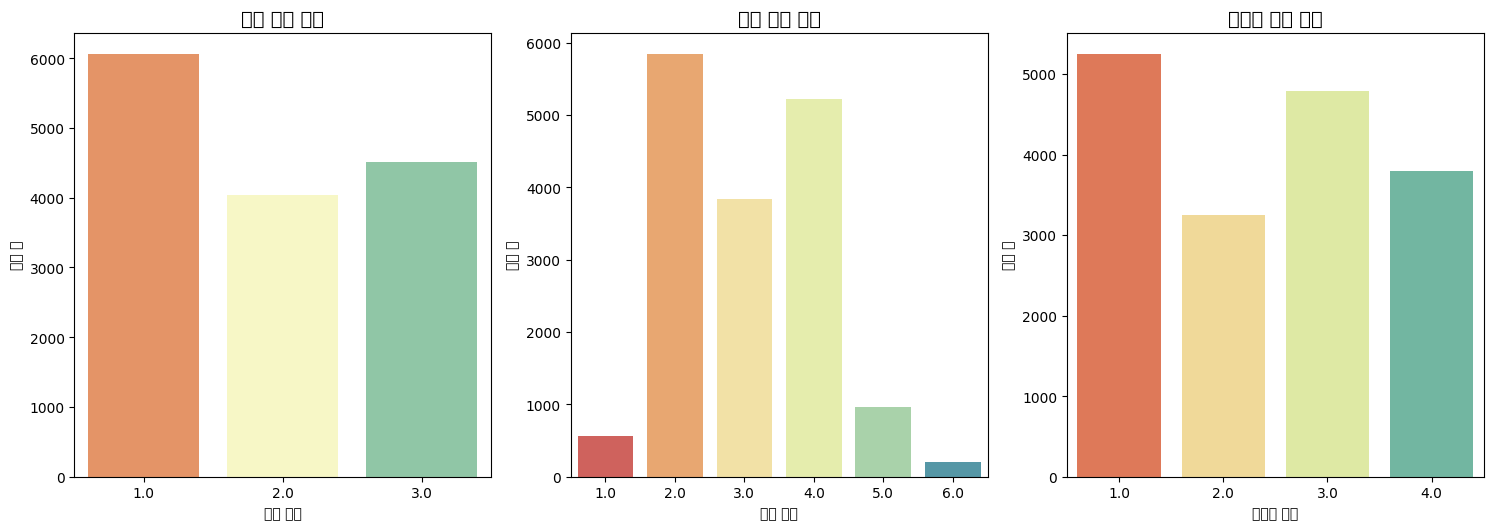

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시각화할 변수 리스트
targets = ['HE_DM_HbA1c', 'HE_obe', 'HE_HP']
column_labels = {
    'HE_DM_HbA1c': '당뇨 여부',
    'HE_obe': '비만 여부',
    'HE_HP': '고혈압 여부'
}

# 서브플롯 설정 (2행 4열: 8개의 칸 중 3개 사용)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()  # 2차원 → 1차원 평탄화

# 각 변수에 대해 countplot 그리기
for i, var in enumerate(targets):
    sns.countplot(x=var, data=data, palette="Spectral", ax=axes[i])
    axes[i].set_title(f"{column_labels[var]} 분포", fontsize=14)
    axes[i].set_xlabel(column_labels[var])
    axes[i].set_ylabel('빈도 수')

# 사용하지 않는 subplot 숨기기
for j in range(len(targets), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
